In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.constants import golden
plt.style.use('default')
plt.rc('figure', figsize=((5.0, 5.0 / golden)))

# VARIABILI
csvfile = 'csv/alldata.csv'
distance_param = 'ADistance'
gcolors = ['green', 'orange', 'red']
gbins = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
myindex = [
    '0:00', '7:00', '8:00', '9:00', '10:00',
    '11:00', '12:00', '13:00', '14:00',
    '15:00','16:00', '17:00', '18:00',
    '19:00', '20:00', '21:00', '22:00',
    '23:00']

# LETTURA DATI
tragitti = pd.read_csv(csvfile, index_col=False)

# PULIZIA DATI
pre_lock_cond = (tragitti['Month'] == 3) & (tragitti['Day'] < 13)
post_lock_cond = ((tragitti['Month'] == 5) & (tragitti['Day'] >= 4)) | (tragitti['Month'] > 5)
tragitti = tragitti[post_lock_cond]

def clean(df):
    distance_cond = df[distance_param] > 0
    moovit_cond = df['Public'] > 12
    public_cond = df['Public'] > 0
    bike_cond = df['Bike'] > 0
    foot_cond = df['Foot'] > 0
    car_cond = df['Car'] > 0
    car2go_cond = df['Car2Go'] > 0
    enjoy_cond = df['Enjoy'] > 0
    coherence_cond = (df['Car'] <= df['Car2Go']) & (df['Car'] <= df['Enjoy'])
    cleaned = distance_cond & public_cond & bike_cond & foot_cond & car_cond & car2go_cond & enjoy_cond & coherence_cond
    return cleaned

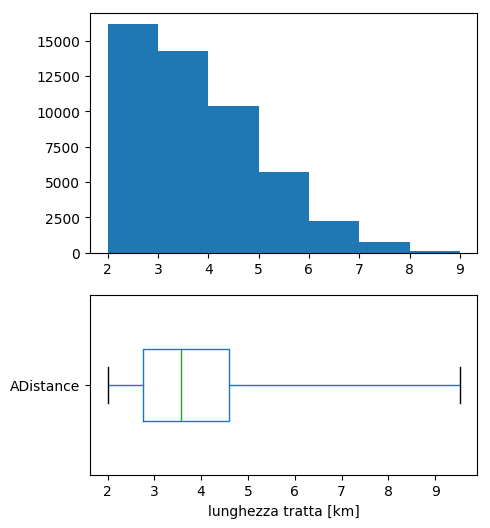

In [2]:
tragitti = tragitti[clean(tragitti)]
sample = tragitti[distance_param]

f, (h, b) = plt.subplots(2, 1, gridspec_kw = {'height_ratios':[4, 3]})
f.set_figheight(6)

h.yaxis.label.set_visible(False)

sample.plot.hist(bins=gbins, ax=h)
sample.plot.box(vert=False, whis='range', ax=b, widths=.4)
plt.xlabel('lunghezza tratta [km]')
plt.show()

In [3]:
sample.describe()

count    49560.000000
mean         3.794265
std          1.271980
min          2.000031
25%          2.763304
50%          3.574016
75%          4.595611
max          9.527613
Name: ADistance, dtype: float64

In [9]:
sample.median()

3.5740155000000002

In [4]:
hour_length_freq = pd.crosstab(
    index=tragitti['Hour'],
    columns=pd.cut(tragitti[distance_param], bins=gbins))

hour_length_freq.index = myindex
hour_length_freq

ADistance,"(2.0, 3.0]","(3.0, 4.0]","(4.0, 5.0]","(5.0, 6.0]","(6.0, 7.0]","(7.0, 8.0]","(8.0, 9.0]"
0:00,916,760,559,278,107,34,4
7:00,890,728,580,306,114,32,4
8:00,844,798,524,299,120,42,6
9:00,882,743,548,326,126,40,6
10:00,859,816,533,315,146,48,5
11:00,868,789,585,298,107,28,9
12:00,884,805,594,311,123,44,15
13:00,897,803,549,355,138,42,9
14:00,898,757,559,336,142,41,8
15:00,895,748,600,321,121,31,5


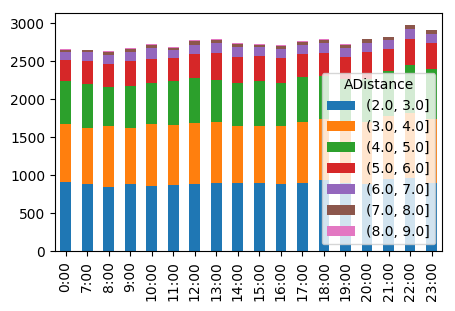

In [5]:
hour_length_freq.plot.bar(stacked=True)
plt.show()

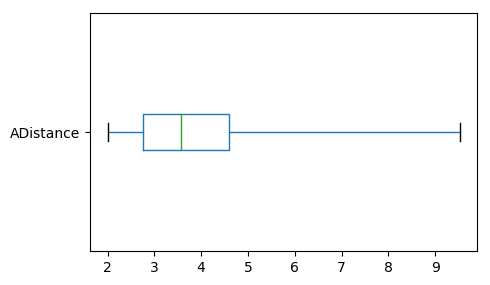

In [6]:
tragitti[distance_param].plot.box(vert=False, whis='range')
plt.show()

In [7]:
length_hour_freq = pd.crosstab(
    index=pd.cut(tragitti[distance_param], bins=gbins),
    columns='%')

(length_hour_freq / sum(length_hour_freq.values)) \
    .apply(lambda p: np.round(p, 4)*100)

col_0,%
ADistance,
"(2.0, 3.0]",32.61
"(3.0, 4.0]",28.75
"(4.0, 5.0]",20.90
"(5.0, 6.0]",11.54
"(6.0, 7.0]",4.47
"(7.0, 8.0]",1.46
"(8.0, 9.0]",0.27


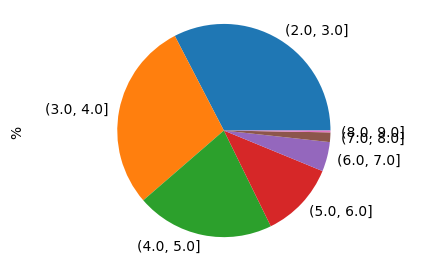

In [8]:
length_hour_freq.plot.pie('%', legend=False)
plt.axis('equal')
plt.show()